### Combined script for all conditions

In [1]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from matplotlib.collections import LineCollection
import seaborn as sns

import trompy as tp
import csv

colors_restricted = "#90219C"
colors_adlib_light = "#e56357"
colors_adlib_dark =  "#D9A441"
colors_sucralose = "#F4A6B1"

In [2]:
DATAFOLDER = Path("C:/Data/hislight_pickles/")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/figures")
STATSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/stats")

with open(DATAFOLDER / "HL3_restricted_dark.pickle", 'rb') as handle:
    restricted_dark = pickle.load(handle)

with open(DATAFOLDER / "HL3_adlib_dark.pickle", 'rb') as handle:
    adlib_dark = pickle.load(handle)

with open(DATAFOLDER / "HL3_adlib_light.pickle", 'rb') as handle:
    adlib_light = pickle.load(handle)

with open(DATAFOLDER / "HL3_adlib_sucralose.pickle", 'rb') as handle:
    adlib_sucralose = pickle.load(handle)

In [3]:
def get_list_of_mice(data):

    mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                        "HL202", "HL205", "HL206", "HL211",
                        "HL301", "HL304", "HL305"]
    
    #"HL202", "HL205", "HL206", "HL211" have poor placements without virus in PVH
    #HL 306, 308 have no virus
    #HL301, HL304, HL305 have poor fiber placement
    #HL313 - HL318 are control mice
    
    list_of_mice = []

    for key, val in adlib_dark.items():
        if val["mouse_ID"] not in list_of_mice and val["mouse_ID"] not in mice_to_exclude:
            list_of_mice.append(val["mouse_ID"])
            
    return list_of_mice

In [4]:
get_list_of_mice(restricted_dark)

['HL302', 'HL303', 'HL307', 'HL309', 'HL310', 'HL311', 'HL312']

In [5]:
def get_snips(data):
    
    list_of_mice = get_list_of_mice(data)

    snips_mean_start= []
    snips_mean_end = []
    snips_mean_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    for mouse in list_of_mice:
        snips_start = []
        snips_end = []
        snips_full = []

        for key, val in data.items():
            if val["mouse_ID"]==mouse:
                if len(val["licks"]) < 10:
                    continue

                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
                snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

                snipper = tp.Snipper(val["corrected"],
                                        lickdata["rStart"],
                                        end=lickdata["rEnd"],
                                        fs=val["fs"],
                                        pre=pre,
                                        post=post,
                                        binlength=binlength,
                                        zscore=True
                                        )

                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=8, eventbalance=[6,2])
                snipper.find_potential_artifacts(threshold=12, method="absolute_diff", showplot=True, remove=True)
                snips_full.append(snipper.snips)


        snips_start = np.vstack(snips_start)
        snips_end = np.vstack(snips_end)
        
        try:
            snips_full = np.vstack(snips_full)
            snips_mean_full.append(np.mean(snips_full, axis=0))
            print("adding this mouse")
        except:
            print("no snips to concatenate")

        snips_mean_start.append(np.mean(snips_start, axis=0))
        snips_mean_end.append(np.mean(snips_end, axis=0))
   
    snips_mean_full = np.array(snips_mean_full)
    
    return snips_mean_start, snips_mean_end, snips_mean_full

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\lickcalc.py:239: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper


Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 1 potential artifacts.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 pot

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 1 p

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)


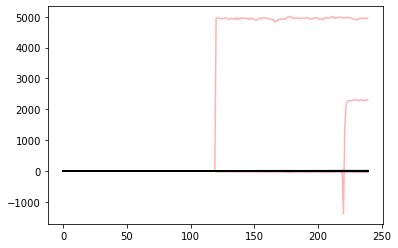

In [6]:
#getting snips
restricted_start, restricted_end, restricted_full = get_snips(restricted_dark)
dark_start, dark_end, dark_full = get_snips(adlib_dark)
light_start, light_end, light_full = get_snips(adlib_light)
sucralose_start, sucralose_end, sucralose_full = get_snips(adlib_sucralose)

In [8]:
def plot_shaded_error(data, color, ax):
    
    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    eventbalance=[6,2]

    try:
        assert(eventbalance[0] + eventbalance[1] == mineventlength)
        early_t = eventbalance[0]
        late_t = eventbalance[1]
    except:
        print("No event balance given. Using default 50-50 split.")
        early_t = mineventlength/2
        late_t = mineventlength/2

    bins_early = int((pre + early_t) / binlength)
    bins_late = int((post + late_t) / binlength)

    # data1
    x1 = np.arange(0,bins_early)
    x2 = np.arange(data.shape[1] - bins_late, data.shape[1])

    mean = np.mean(data, axis=0)
    error_values = np.std(data, axis=0) / np.sqrt(len(data))

    ax.plot(x1, mean[:bins_early], color=color)
    ax.plot(x2, mean[-bins_late:], color=color)

    ax.fill_between(x1, mean[:bins_early]-error_values[:bins_early], 
                    mean[:bins_early]+error_values[:bins_early], 
                    color=color, alpha=0.3,
                    linewidth=0,
                    )
    ax.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], 
                    mean[-bins_late:]+error_values[-bins_late:], 
                    color=color, alpha=0.3,
                    linewidth=0
                    )
    

def make_snips_plot(data1, data2, color1, color2):
    
    f, ax =plt.subplots(figsize=[1.8,1.6],
                    gridspec_kw={
                                "hspace":0.3,
                                "left":0.16,
                                "right":0.98,
                                "top":0.98,
                                "bottom":0.02}
                    )



    # data2
    
    plot_shaded_error(data1, color1, ax)
    plot_shaded_error(data2, color2, ax)

    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim([0,240])

    transform = blended_transform_factory(ax.transData, ax.transAxes)
    ax.plot([190,240], [0.05, 0.05], linewidth=2, color="k", transform=transform)

    ax.plot([2,2], [-1, -2], linewidth=2, color="k")

    ax.axvline(50, color="k", linestyle="--", alpha=0.5)
    ax.axvline(140, color="k", linestyle="--", alpha=0.5)
    
    return f


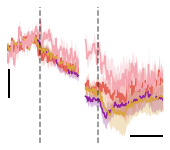

In [9]:
f, ax =plt.subplots(figsize=[2.8,2.5])

plot_shaded_error(restricted_full, colors_restricted, ax)
plot_shaded_error(light_full, colors_adlib_light, ax)
plot_shaded_error(dark_full, colors_adlib_dark, ax)
plot_shaded_error(sucralose_full, colors_sucralose, ax)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim([0,240])

transform = blended_transform_factory(ax.transData, ax.transAxes)
ax.plot([190,240], [0.05, 0.05], linewidth=2, color="k", transform=transform)

ax.plot([2,2], [-1, -2], linewidth=2, color="k")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(140, color="k", linestyle="--", alpha=0.5)

f.savefig(FIGSFOLDER / "VMH_all_snips.pdf")


In [10]:
epochs = {
    'baseline': (10, 50),
    'lick_early': (50, 110),
    'lick_late': (120, 140),
    'early_post': (140, 190),
    'late_post': (190, 240)
}

def calculate_auc_by_epoch(data, epochs):

    # Initialize results
    auc_baseline = []
    auc_lick_early = []
    auc_lick_late = []
    auc_early_post = []
    auc_late_post = []

    # Calculate AUCs for each snippet
    for snip in data:
        # Calculate AUC for each epoch and normalize
        baseline_auc = np.trapz(snip[epochs['baseline'][0]:epochs['baseline'][1]]) / (epochs['baseline'][1] - epochs['baseline'][0])
        lick_early_auc = np.trapz(snip[epochs['lick_early'][0]:epochs['lick_early'][1]]) / (epochs['lick_early'][1] - epochs['lick_early'][0])
        lick_late_auc = np.trapz(snip[epochs['lick_late'][0]:epochs['lick_late'][1]]) / (epochs['lick_late'][1] - epochs['lick_late'][0])
        early_post_auc = np.trapz(snip[epochs['early_post'][0]:epochs['early_post'][1]]) / (epochs['early_post'][1] - epochs['early_post'][0])
        late_post_auc = np.trapz(snip[epochs['late_post'][0]:epochs['late_post'][1]]) / (epochs['late_post'][1] - epochs['late_post'][0])
        
        # Append to respective lists
        auc_baseline.append(baseline_auc)
        auc_lick_early.append(lick_early_auc)
        auc_lick_late.append(lick_late_auc)
        auc_early_post.append(early_post_auc)
        auc_late_post.append(late_post_auc)
    
    return auc_baseline, auc_lick_early, auc_lick_late, auc_early_post, auc_late_post


In [14]:
restricted_baseline_AUC, restricted_early_lick_AUC, restricted_late_lick_AUC, restricted_early_post_AUC, restricted_late_post_AUC = calculate_auc_by_epoch(restricted_full, epochs)
light_baseline_AUC, light_early_lick_AUC, light_late_lick_AUC, light_early_post_AUC, light_late_post_AUC = calculate_auc_by_epoch(light_full, epochs)
dark_baseline_AUC, dark_early_lick_AUC, dark_late_lick_AUC, dark_early_post_AUC, dark_late_post_AUC = calculate_auc_by_epoch(dark_full, epochs)
sucralose_baseline_AUC, sucralose_early_lick_AUC, sucralose_late_lick_AUC, sucralose_early_post_AUC, sucralose_late_post_AUC = calculate_auc_by_epoch(sucralose_full, epochs)

In [34]:
tp.barscatter?

In [32]:
def make_AUC_plot(restricted, light, dark, sucralose):

    f, ax = plt.subplots(figsize=[1, 1])  
    
    tp.barscatter([restricted, light, dark, sucralose],
              barfacecolor=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose],
              barfacecolor_option="individual",
              baredgecolor=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose],
              baredgecolor_option="individual",
              scattersize=20,
              scatteralpha=0.6,
              scatterlinecolor= "grey",
              ax=ax)
    
    ax.set_yticks([-6, -3, 0, 3])
    ax.set_ylim([-6, 4])
    ax.set_yticklabels([])
    
    for spine in ["top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)
    
    return f  

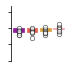

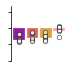

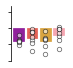

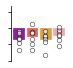

In [33]:
f = make_AUC_plot(restricted_early_lick_AUC, light_early_lick_AUC, dark_early_lick_AUC, sucralose_early_lick_AUC)
f.savefig(FIGSFOLDER / "VMH_AUC_early_lick_epoch_2.pdf")

f = make_AUC_plot(restricted_late_lick_AUC, light_late_lick_AUC, dark_late_lick_AUC, sucralose_late_lick_AUC)
f.savefig(FIGSFOLDER / "VMH_AUC_late_lick_epoch_2.pdf")

f = make_AUC_plot(restricted_early_post_AUC, light_early_post_AUC, dark_early_post_AUC, sucralose_early_post_AUC)
f.savefig(FIGSFOLDER / "VMH_AUC_early_post_epoch_2.pdf")

f = make_AUC_plot(restricted_late_post_AUC, light_late_post_AUC, dark_late_post_AUC, sucralose_late_post_AUC)
f.savefig(FIGSFOLDER / "VMH_AUC_late_post_epoch_2.pdf")

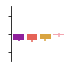

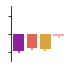

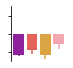

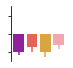

In [15]:
def auc(data, epoch=(50, 70)):
    """Compute area under the curve (AUC) for a given epoch, normalized by the epoch length."""
    epoch_data = np.array(data)[:, epoch[0]:epoch[1]]
    auc_value = np.trapz(epoch_data, axis=1)
    epoch_length = epoch[1] - epoch[0]  # Calculate the epoch length
    return auc_value / epoch_length  # Normalize by epoch length

def mean_auc(data, epoch=(50, 70)):
    """Compute the mean normalized AUC for a given epoch."""
    return np.mean(auc(data, epoch=epoch))

baseline_epoch = (10, 50)
early_lick_epoch = (50, 110)
late_lick_epoch = (120, 140)
early_post_epoch = (140, 190)
late_post_epoch = (190, 240)


def make_AUC_plot(epoch):
    snips = [restricted_full, light_full, dark_full, sucralose_full]
    colors = [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]

    f, ax = plt.subplots(figsize=[1, 1])  

    mean_aucs = []
    std_errors = []

    # Collect normalized AUC data
    for snip in snips:
        auc_data = auc(snip, epoch=epoch)
        mean_aucs.append(np.mean(auc_data))
        std_errors.append(np.std(auc_data) / np.sqrt(len(auc_data)))

    # Plotting 
    x_positions = np.arange(len(mean_aucs)) 

    ax.bar(x_positions, mean_aucs, color=colors)

    for x, ymean, yerr, color in zip(x_positions, mean_aucs, std_errors, colors):
        ax.errorbar(x, ymean, yerr=yerr, color=color, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([2, 0, -2])
    ax.set_ylim([-3, 3])
    ax.set_yticklabels([])

    # Hide spines
    for spine in ["top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)
    
    return f  # Return the figure object

# Save the plots
f = make_AUC_plot(early_lick_epoch)
#f.savefig(FIGSFOLDER / "VMH_AUC_early_lick_epoch.pdf")

f = make_AUC_plot(late_lick_epoch)
#f.savefig(FIGSFOLDER / "VMH_AUC_late_lick_epoch.pdf")

f = make_AUC_plot(early_post_epoch)
#f.savefig(FIGSFOLDER / "VMH_AUC_early_post_epoch.pdf")

f = make_AUC_plot(late_post_epoch)
f.savefig(FIGSFOLDER / "VMH_AUC_late_post_epoch.pdf")


In [16]:
conditions = ["restricted", 'light', 'dark', "sucralose"]

epochs = [baseline_epoch, early_lick_epoch, late_lick_epoch, early_post_epoch, late_post_epoch]

snips = [restricted_full, light_full, dark_full, sucralose_full]
colors = [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]

#getting CSV file for stats
epoch_labels = ["baseline_epoch", "early_lick_epoch", "late_lick_epoch", "early_post_epoch", "late_post_epoch"]

# Correcting headers generation
headers = []
for epoch_label in epoch_labels:
    for condition in conditions:
        headers.append(f'{condition} {epoch_label}')

# Initialize list to hold AUC data across all epochs
auc_all_epochs = []

for epoch in epochs:
    # Stack AUC data for all conditions for this epoch
    auc_epoch = np.column_stack([auc(snip, epoch=epoch) for snip in snips])
    auc_all_epochs.append(auc_epoch)

# Convert list of AUC arrays into a single array
auc_all_epochs = np.hstack(auc_all_epochs)

# Create the header array with correct shape
headers_array = np.array(headers).reshape(1, -1)

# Check if headers and AUC data have the same number of columns
assert headers_array.shape[1] == auc_all_epochs.shape[1], \
    "Mismatch between headers and AUC data column counts."

# Stack headers and data
auc_with_headers = np.vstack([headers_array, auc_all_epochs])

# Save to a CSV file
#np.savetxt('C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/VMH_AUC_all_conditions.csv', auc_with_headers, delimiter=',', fmt='%s')


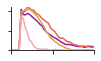

In [17]:
#For Lick frequency

def get_runs_from_all_2 (data):
    mice = get_list_of_mice(data)
    temp_runs = []
    
    for mouse in mice:
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                onset = val["licks"]
                temp_runs.append(get_runs(onset))

    all_runs = []
    for session in temp_runs:
        for run in session:
            all_runs.append(run)
            
    return all_runs

restricted_runs_2 = get_runs_from_all_2(restricted_dark)
light_runs_2 = get_runs_from_all_2(adlib_light)
dark_runs_2 = get_runs_from_all_2(adlib_dark)
sucralose_runs_2 = get_runs_from_all_2(adlib_sucralose)

bins= np.arange(-5,40,1)

restricted_hist = np.histogram(tp.flatten_list(restricted_runs_2), bins= bins)
light_hist = np.histogram(tp.flatten_list(light_runs_2), bins= bins)
dark_hist = np.histogram(tp.flatten_list(dark_runs_2), bins= bins)
sucralose_hist = np.histogram(tp.flatten_list(sucralose_runs_2), bins= bins)

restricted_freq = restricted_hist[0]/len(restricted_runs_2)
light_freq = light_hist[0]/len(light_runs_2)
dark_freq = dark_hist[0]/len(dark_runs_2)
sucralose_freq = sucralose_hist[0]/len(sucralose_runs_2)

f, ax = plt.subplots(figsize=[1.5, 0.8])

ax.plot(restricted_freq, color=colors_restricted)
ax.plot(light_freq, color=colors_adlib_light)
ax.plot(dark_freq, color=colors_adlib_dark)
ax.plot(sucralose_freq,  color=colors_sucralose)

ax.set_xlim(0,4)
ax.set_xticks([0,20,40])

ax.set_ylim(0,5.6)
ax.set_yticks([0, 2.5, 5])

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

f.savefig(FIGSFOLDER / "VMH_lick_frequency.pdf")

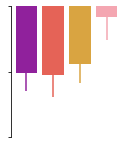

In [18]:
def auc(data, epoch=(50,100)):
    return np.trapz(np.array(data)[:, epoch[0]:epoch[1]], axis=1)

def mean_auc(data, epoch=(50,100)):
    return np.mean(auc(data, epoch=epoch))

f, ax = plt.subplots(figsize=(2,2.4))

ax.bar([1,2,3,4],
       [mean_auc(restricted_full),
        mean_auc(light_full),
        mean_auc(dark_full),
        mean_auc(sucralose_full)
        ],
       color=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
         )

for x, ydata, color in zip([1,2,3,4],
                            [auc(restricted_full),
                            auc(light_full),
                            auc(dark_full),
                            auc(sucralose_full)
                            ],
                            [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
                            ):
    
    ax.errorbar(x, np.mean(ydata),
                yerr=np.std(ydata) / np.sqrt(len(ydata)),
                color=color,
                zorder=0
                      ),
    
ax.set_xticks([])
ax.set_ylim([-60, 0])
ax.set_yticks([-60, -30, 0])
ax.set_yticklabels([])

for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
    
#f.savefig(FIGSFOLDER / "start_auc.pdf")

In [66]:
auc_start_sucralose = auc(sucralose_full, epoch=(50,100))

In [67]:
auc_start_sucralose

array([-60.45118   ,   5.39532924,  32.43987361, -91.38987476,
       -27.50301217, -80.25615965])

In [58]:
#AUC start for stats, start

auc_start_restricted = auc(restricted_full, epoch=(50,100))
auc_start_dark = auc(dark_full, epoch=(50,100))
auc_start_light = auc(light_full, epoch=(50,100))
auc_start_sucralose = auc(sucralose_full, epoch=(50,100))

auc_start = np.column_stack((auc_start_restricted, auc_start_dark, auc_start_light, auc_start_sucralose))

np.savetxt('C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/auc_start.csv', auc_start, delimiter=',', fmt='%.6f')

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 7 and the array at index 3 has size 6

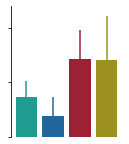

In [19]:
post_epoch = (210,260)

f, ax = plt.subplots(figsize=(2,2.4))

ax.bar([1,2,3,4],
       [mean_auc(restricted_full, epoch=post_epoch),
        mean_auc(light_full, epoch=post_epoch),
        mean_auc(dark_full, epoch=post_epoch),
        mean_auc(sucralose_full, epoch=post_epoch)
        ],
       color=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
         )

for x, ydata, color in zip([1,2,3,4],
                            [auc(restricted_full, epoch=post_epoch),
                            auc(light_full, epoch=post_epoch),
                            auc(dark_full, epoch=post_epoch),
                            auc(sucralose_full, epoch=post_epoch)
                            ],
                            [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
                            ):
    
    ax.errorbar(x, np.mean(ydata),
                yerr=np.std(ydata) / np.sqrt(len(ydata)),
                color=color,
                zorder=0
                      ),
    
ax.set_ylim([0, 120])
ax.set_yticks([0, 50, 100])
ax.set_yticklabels([])
ax.set_xticks([])

for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
    
f.savefig(FIGSFOLDER / "end_auc.pdf")

In [20]:
mean_auc(sucralose_full, epoch=(160,260))

51.74101150296459

In [21]:
sucralose_full.shape

(6, 260)

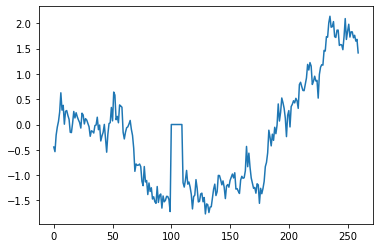

In [22]:
plt.plot(np.mean(sucralose_full, axis=0))

0.24570015630919834
-0.6946060757917043
0.15156154634132718
0.27605361680110035
-2.8863125303924675
0.2414530371319754


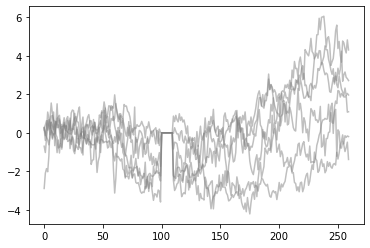

In [23]:
for s in sucralose_full:
    plt.plot(s, color="gray", alpha=0.5)
    print(s[0])